In [2]:
#Importing the libraries. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline 

In [3]:
#Importing the hybrid_vehicle_price_data and checking the data. 

hybrid = pd.read_csv('hybrid_vehicle_price_data.csv')

hybrid

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
0,1,Prius (1st Gen),1997,24509.74,7.46,41.26,41.26,C,1
1,2,Tino,2000,35354.97,8.20,54.10,54.10,C,1
2,3,Prius (2nd Gen),2000,26832.25,7.97,45.23,45.23,C,1
3,4,Insight,2000,18936.41,9.52,53.00,53.00,TS,7
4,5,Civic (1st Gen),2001,25833.38,7.04,47.04,47.04,C,1
...,...,...,...,...,...,...,...,...,...
148,150,S400,2013,92350.00,13.89,21.00,21.00,L,2
149,151,Prius Plug-in,2013,32000.00,9.17,50.00,95.00,M,3
150,152,C-Max Energi Plug-in,2013,32950.00,11.76,43.00,100.00,M,3
151,153,Fusion Energi Plug-in,2013,38700.00,11.76,43.00,100.00,M,3


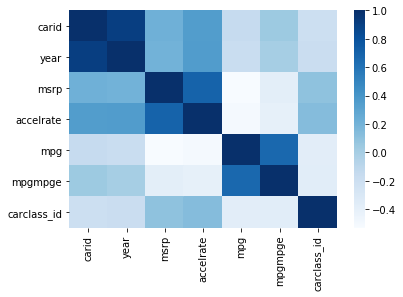

In [4]:
#Creating a heat map to show the correlation between each variables within the dataset.

sns.heatmap(hybrid.corr(), cmap = 'Blues')

Based on the heat map, there is a strong positive correlation between msrp and accelrate while there is a strong negative correlation between mpg and msrp. 

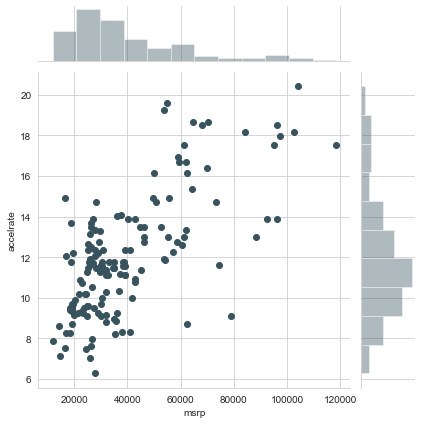

In [4]:
#Creating a joint plot to show the relationship between msrp and accelrate. Checking to see if there is a correlation between the  two variables.

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.jointplot(x='msrp', y='accelrate', data=hybrid)

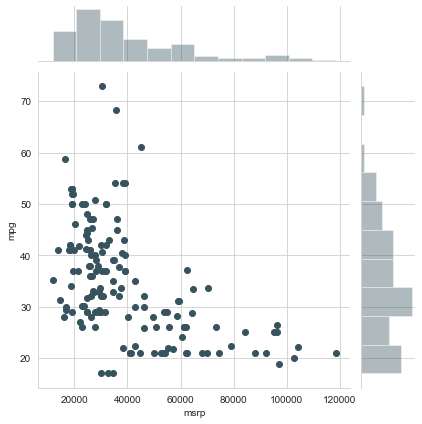

In [5]:
#Creating joint plot to show the correlation between msrp and mpg. 

sns.jointplot(x='msrp',y='mpg', data=hybrid)

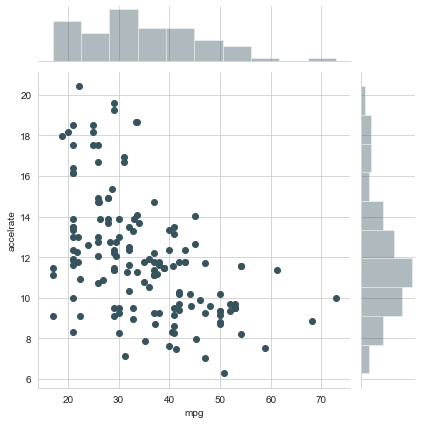

In [6]:
#Creating joint plot to show the correlation between mpg and accelrate. 

sns.jointplot(x='mpg',y='accelrate', data=hybrid)

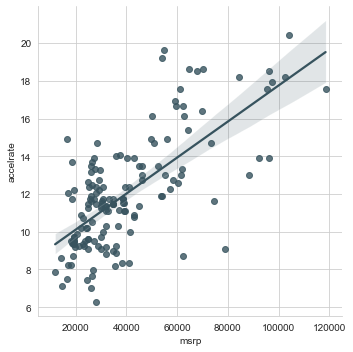

In [7]:
#Creating a linear model plot to represent the relationship between msrp and accelrate. 

sns.lmplot(x = 'msrp', y = 'accelrate', data = hybrid)

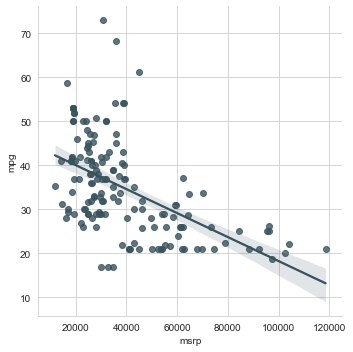

In [8]:
#Creating a linear model plot to represent the relationship between msrp and mpg. 

sns.lmplot(x = 'msrp', y = 'mpg', data = hybrid)

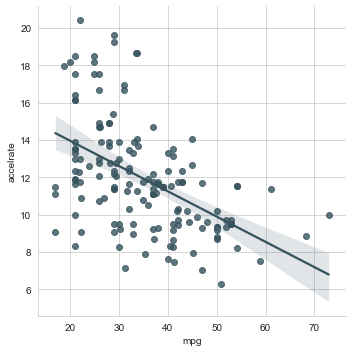

In [9]:
#Creating a linear model plot to represent the relationship between mpg and accelrate. 

sns.lmplot(x = 'mpg', y = 'accelrate', data = hybrid)

In [10]:
#Training the linear regression model based on the variables that we are hypothesizing will relate to price of the msrp. 

y = hybrid['msrp']

X = hybrid[['accelrate', 'mpg']]

In [11]:
#Using a model selection in order to to split the data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [12]:
#Training the model for linear regression. 

lm = LinearRegression()

In [13]:
#Train/fit lm onto the training data. 

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#Printing the intercept. 

print(lm.intercept_)

13442.110195396446


In [15]:
#Printing the coeffcients of the model. 

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

coeff_df

,Coefficient
accelrate,3934.959283
mpg,-613.242054


The results of the coeffcients are interprested as follows: 

- A 1 unit increase in accelrate is associated with an increase of approximately 3,934.96 total dollars of msrp. 
- A 1 unit increase in mpg is associated with a decrease of approximately 613.24 total dollars of msrp.

Text(0, 0.5, 'Predicted-Y')

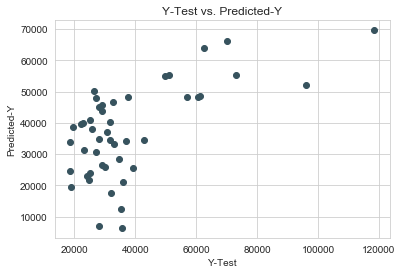

In [16]:
#Predicting the test data and evaluating its performance to check to see if there is a linear relationship. 

predictions = lm.predict(X_test)

plt.scatter(y_test, predictions)
plt.title('Y-Test vs. Predicted-Y')
plt.xlabel('Y-Test')
plt.ylabel('Predicted-Y')

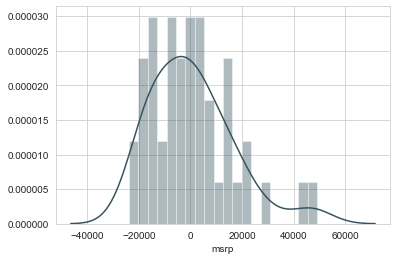

In [20]:
#Creating a histogram of the residuals to check for normal distribution.

sns.distplot((y_test-predictions), bins = 20)

In [18]:
#Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 12250.44607415823
MSE: 254317985.97122407
RMSE: 15947.350437336732
